<a href="https://colab.research.google.com/github/Jorgecuenca1/Vision-computadora-I/blob/main/Tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Practico Nº1 - Vision Por Computadora I**

### **Parte 1:**
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [51]:

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def image_coord_crom(imgRGB):

    #Separo la imagen en las componentes RGB
    im_r, im_g, im_b = cv.split(imgRGB)
    #Calculo del denominador para transformar a coordenadas cromaticas
    den = im_r.astype('uint16') + im_g.astype('uint16') + im_b.astype('uint16')

    #Realizo la cuenta para cada uno de los canales
    im_r_crom = np.zeros(den.shape)
    im_g_crom = np.zeros(den.shape)
    im_b_crom = np.zeros(den.shape)
    
    for i in range(den.shape[0]):
        for j in range(den.shape[1]):
            if (den[i][j] == 0):
                im_r_crom[i][j] = 0
                im_g_crom[i][j] = 0
                im_b_crom[i][j] = 0
            else:
                im_r_crom[i][j] = im_r[i][j] / den[i][j]
                im_g_crom[i][j] = im_g[i][j] / den[i][j]
                im_b_crom[i][j] = im_b[i][j] / den[i][j]
                
    #Combino los canales para volver a generar una imagen
    imgRGB_crom = cv.merge((im_r_crom, im_g_crom, im_b_crom))

    #Uso la funcion normalizar de la libreria de open cv para convertir la imagen a uint8 y lo escalo a 8bits (0 as 255)
    resultimage = np.zeros((imgRGB.shape[0], imgRGB.shape[1]))
    normalizedimage = cv.normalize(imgRGB_crom, resultimage, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)

    return normalizedimage

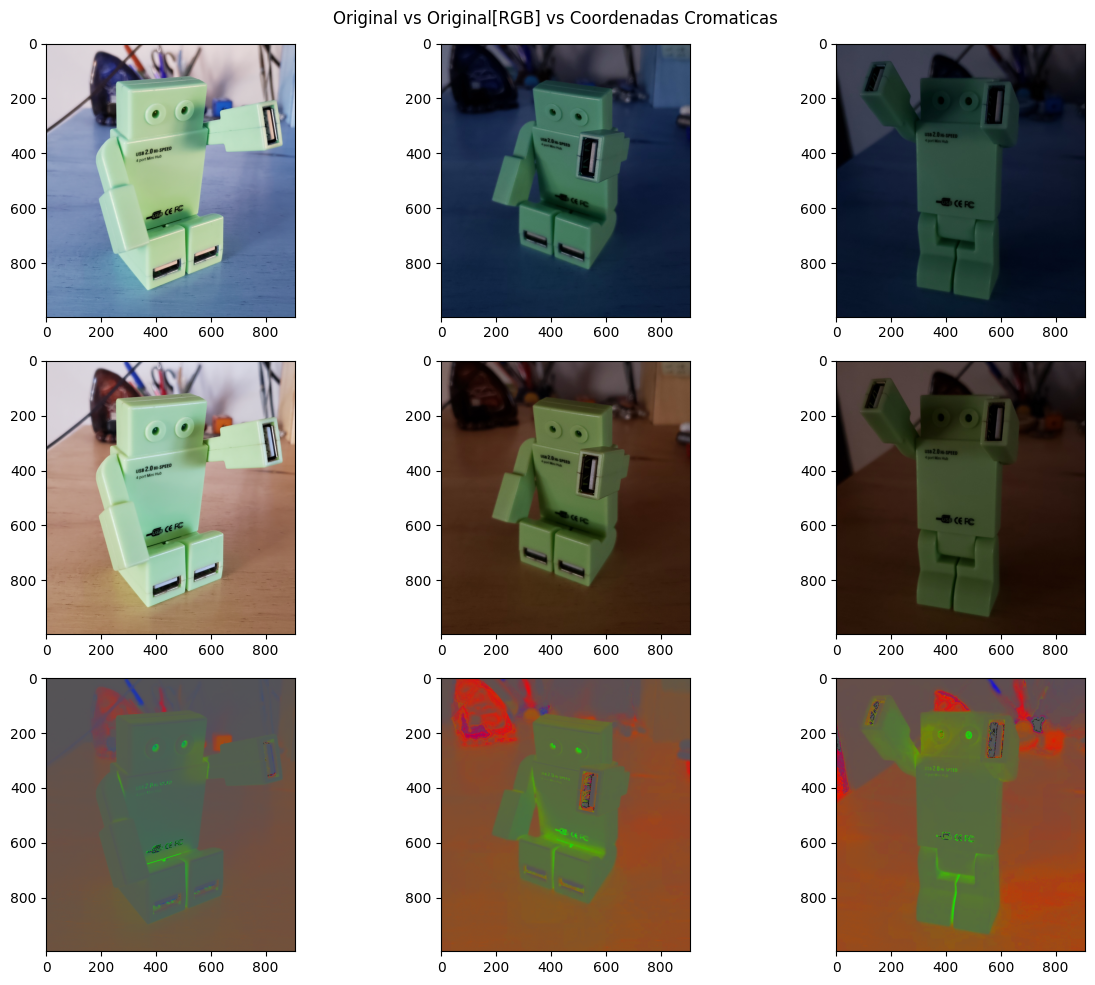

In [22]:
# Cargo la imagen en color
img_1 = cv.imread('CoordCrom_1.png')
img_2 = cv.imread('CoordCrom_2.png')
img_3 = cv.imread('CoordCrom_3.png')

# Paso la imagen de BRG a RGB
imgRGB_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
imgRGB_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
imgRGB_3 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)

# Utilizo la funcion para generar las coordenadas cromaticas en cada imagen
imgRGB_crom_1 = image_coord_crom(imgRGB_1)
imgRGB_crom_2 = image_coord_crom(imgRGB_2)
imgRGB_crom_3 = image_coord_crom(imgRGB_3)

# Genero la ventana grafico y muestro los resultados
fig, axs = plt.subplots(3, 3, figsize=(12,10))
fig.suptitle('Original vs Original[RGB] vs Coordenadas Cromaticas')
fig.tight_layout() 

axs[0,0].imshow(img_1)
axs[0,1].imshow(img_2)
axs[0,2].imshow(img_3)
axs[1,0].imshow(imgRGB_1)
axs[1,1].imshow(imgRGB_2)
axs[1,2].imshow(imgRGB_3)
axs[2,0].imshow(imgRGB_crom_1)
axs[2,1].imshow(imgRGB_crom_2)
axs[2,2].imshow(imgRGB_crom_3)

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [50]:
def image_white_patch(img):

    #Separo la imagen en las componentes RGB
    im_r, im_g, im_b = cv.split(img)

    #Calulo los maximos de cada canal, si el max de dicho canal es 255 (saturacion) lo reemplazo por el percentil del 95%
    if im_r.max() == 255:
        max_r = np.percentile(im_r, 95)
    else:
        max_r = im_r.max()

    if im_r.max() == 255:
        max_g = np.percentile(im_g, 95)
    else:
        max_g = im_g.max()

    if im_r.max() == 255:
        max_b = np.percentile(im_b, 95)
    else:
        max_b = im_b.max()

    #print(im_r.max(), im_g.max(), im_b.max())

    #Aplico el algoritmo de white patch
    im_r_wp = np.clip( (255 / max_r) * im_r, 0, 255).astype('uint8')
    im_g_wp = np.clip( (255 / max_g) * im_g, 0, 255).astype('uint8')
    im_b_wp = np.clip( (255 / max_b) * im_b, 0, 255).astype('uint8')

    #Combino los canales para volver a generar una imagen
    imgRGB_wp = cv.merge((im_r_wp,im_g_wp,im_b_wp))

    return imgRGB_wp

165 138 200
210 250 171
247 157 175
255 255 255
126 252 155
170 255 172
255 134 122
255 201 203


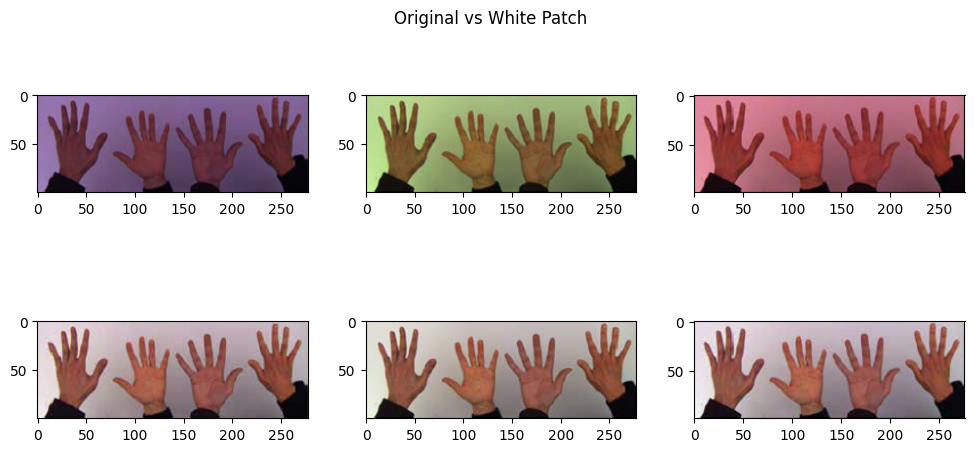

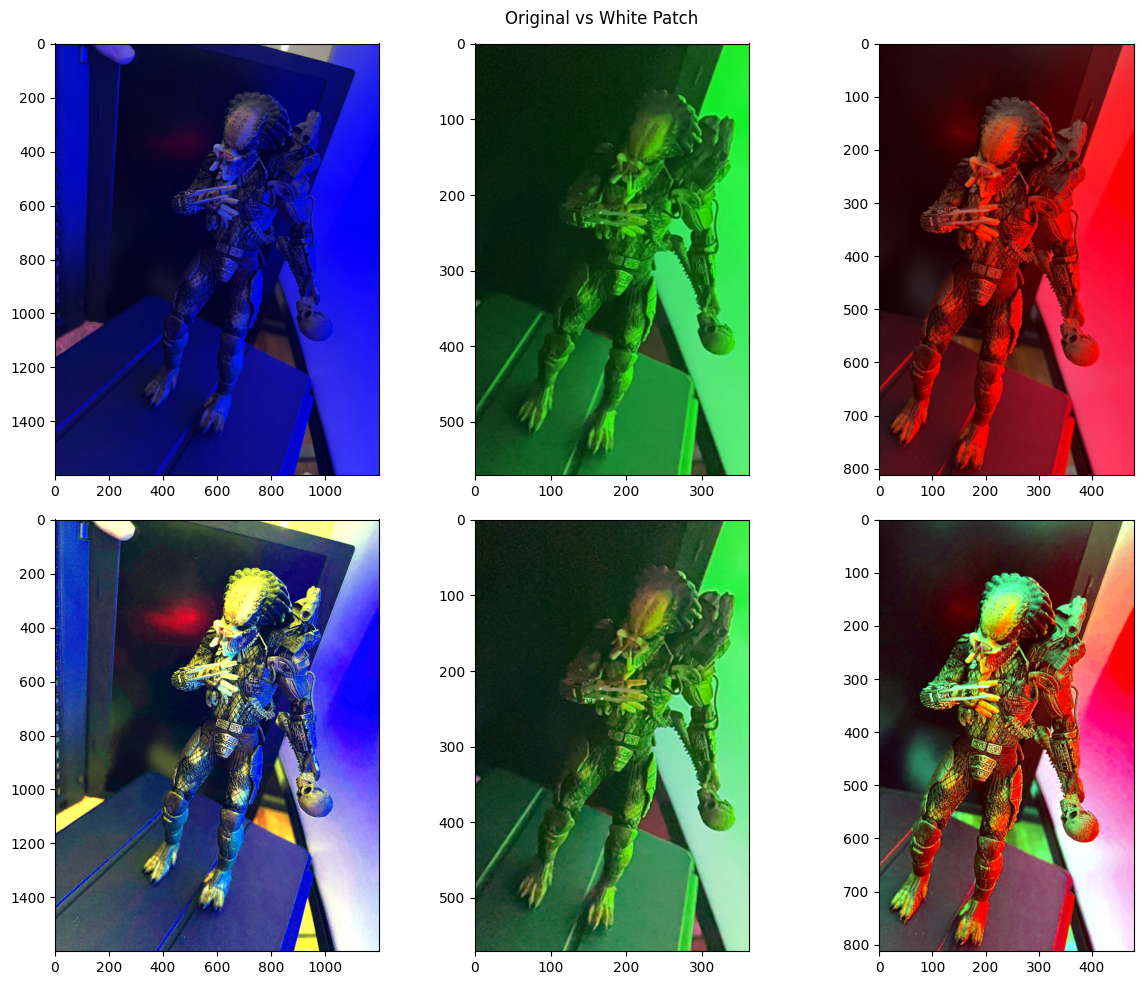

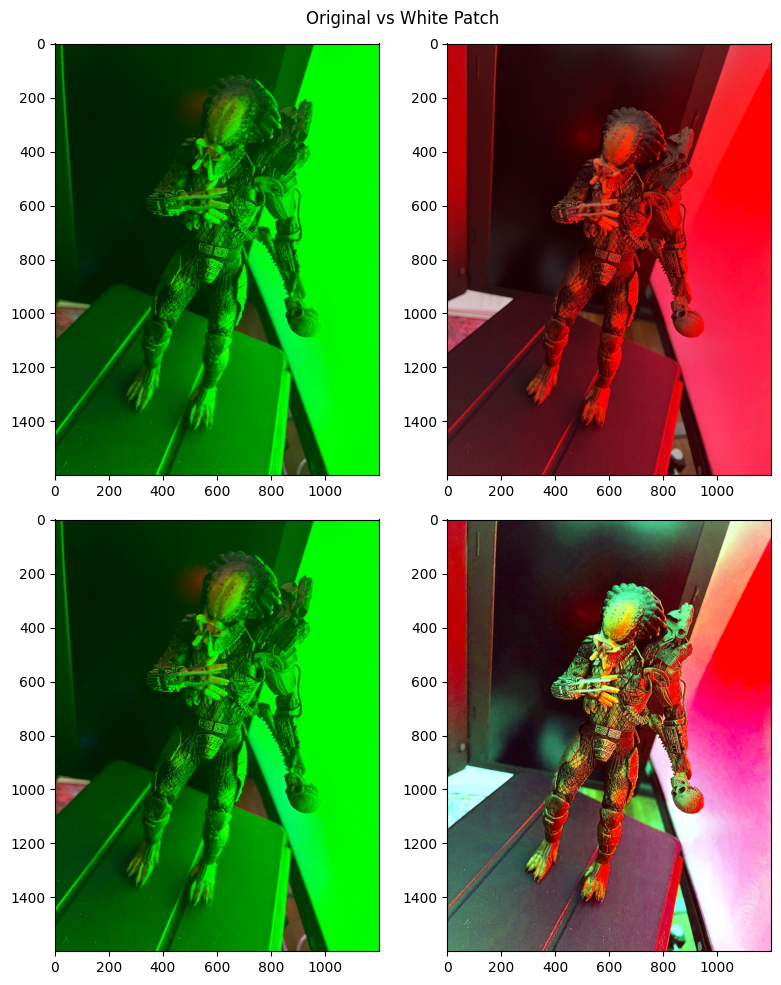

In [59]:
# Cargo la imagen en color
img_1 = cv.imread('test_blue.png')
img_2 = cv.imread('test_green.png')
img_3 = cv.imread('test_red.png')
img_4 = cv.imread('wp_blue.jpg')
img_5 = cv.imread('wp_green.png')
img_6 = cv.imread('wp_green2.jpg')
img_7 = cv.imread('wp_red.png')
img_8 = cv.imread('wp_red2.jpg')

# Paso la imagen de BRG a RGB
imgRGB_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
imgRGB_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
imgRGB_3 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
imgRGB_4 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
imgRGB_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
imgRGB_6 = cv.cvtColor(img_6, cv.COLOR_BGR2RGB)
imgRGB_7 = cv.cvtColor(img_7, cv.COLOR_BGR2RGB)
imgRGB_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)

# Utilizo la funcion para aplicar el algoritmo de Withe Patch en cada imagen
imgWP_wp_1 = image_white_patch(imgRGB_1)
imgWP_wp_2 = image_white_patch(imgRGB_2)
imgWP_wp_3 = image_white_patch(imgRGB_3)
imgWP_wp_4 = image_white_patch(imgRGB_4)
imgWP_wp_5 = image_white_patch(imgRGB_5)
imgWP_wp_6 = image_white_patch(imgRGB_6)
imgWP_wp_7 = image_white_patch(imgRGB_7)
imgWP_wp_8 = image_white_patch(imgRGB_8)

# Genero la ventana grafico y muestro los resultados de las fotos de las manos
fig, axs = plt.subplots(2, 3, figsize=(10,5))
fig.suptitle('Original vs White Patch')
fig.tight_layout()

axs[0,0].imshow(imgRGB_1)
axs[0,1].imshow(imgRGB_2)
axs[0,2].imshow(imgRGB_3)
axs[1,0].imshow(imgWP_wp_1)
axs[1,1].imshow(imgWP_wp_2)
axs[1,2].imshow(imgWP_wp_3)

# Genero la ventana grafico y muestro los resultados de las fotos de los depredadores
fig, axs = plt.subplots(2, 3, figsize=(12,10))
fig.suptitle('Original vs White Patch')
fig.tight_layout() 

axs[0,0].imshow(imgRGB_4)
axs[0,1].imshow(imgRGB_5)
axs[0,2].imshow(imgRGB_7)
axs[1,0].imshow(imgWP_wp_4)
axs[1,1].imshow(imgWP_wp_5)
axs[1,2].imshow(imgWP_wp_7)

# Genero la ventana grafico y muestro los resultados de las otras fotos de los depredadores
fig, axs = plt.subplots(2, 2, figsize=(8,10))
fig.suptitle('Original vs White Patch')
fig.tight_layout() 

axs[0,0].imshow(imgRGB_6)
axs[0,1].imshow(imgRGB_8)
axs[1,0].imshow(imgWP_wp_6)
axs[1,1].imshow(imgWP_wp_8)

### **Parte 2:**
1. Para las imágenes img1_lp.png y img2_lp.png leerlas con OpenCV en escala de grises y visualizarla.

Text(0.5, 1.0, 'img2')

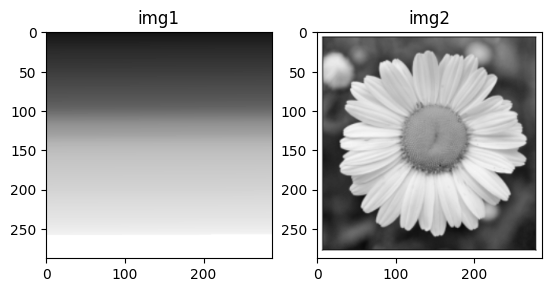

In [61]:
# Cargo las imagenes en escala de grises
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

# Visualizar las imágenes
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('img1')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('img2')

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

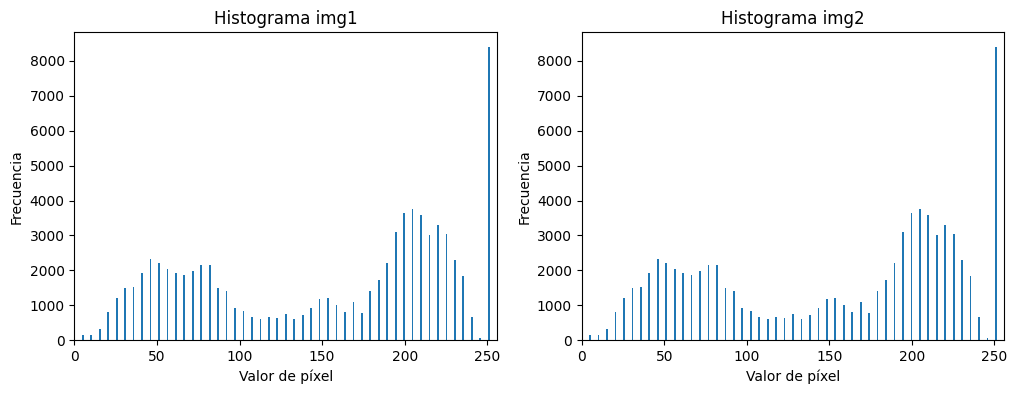

In [63]:
# Definir el número de bins para el histograma
num_bins = 50

# Calcular los histogramas de ambas imágenes
hist1, bins1 = np.histogram(img1, bins=num_bins, range=[0, 256])
hist2, bins2 = np.histogram(img2, bins=num_bins, range=[0, 256])

# Visualizar los histogramas
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.bar(bins1[:-1], hist1, width=1)
plt.xlim([0, 256])
plt.title('Histograma img1')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.bar(bins2[:-1], hist2, width=1)
plt.xlim([0, 256])
plt.title('Histograma img2')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.show()

### Conclusión

#### En el código anterior, hemos calculado y visualizado los histogramas de dos imágenes en escala de grises. Los histogramas muestran la distribución de los valores de píxeles en una imagen y nos pueden ayudar a entender mejor el contenido de la imagen. En los histogramas, el eje x representa los valores de los píxeles y el eje y representa la frecuencia con la que aparecen esos valores en la imagen. 
#### Con los resultados obtenidos en los histogramas de ambas imagenes, se puede observar que pese a que las imagenes son diferentes los histogramas son exactamente iguales. Por lo tanto no se puede utilizar esta herramienta en los modelos de deteccion / clasificacion.

3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

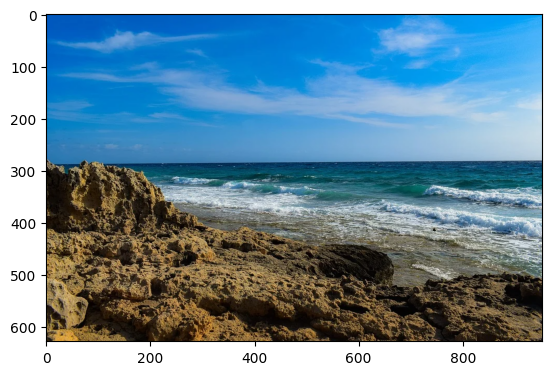

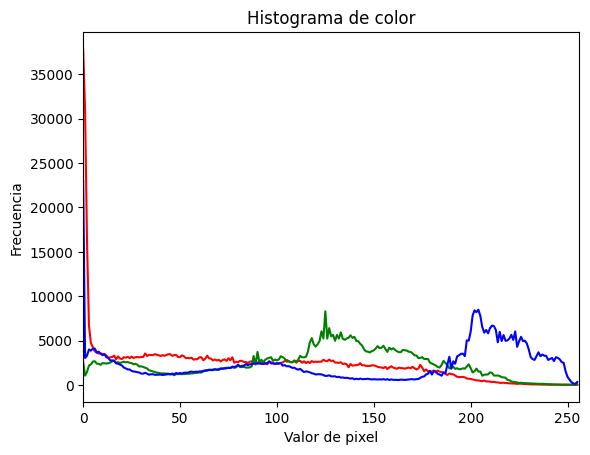

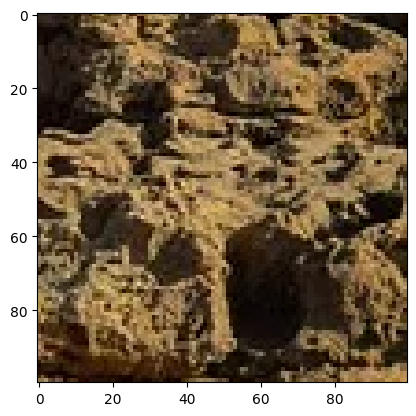

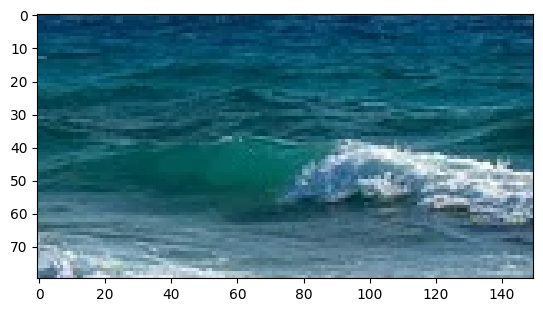

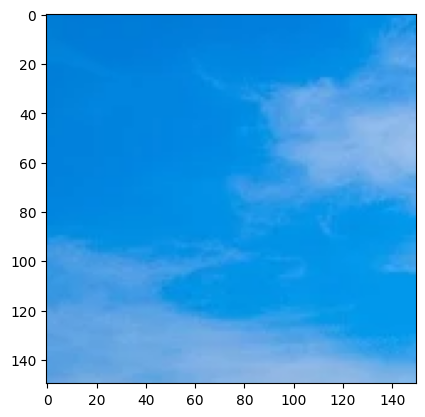

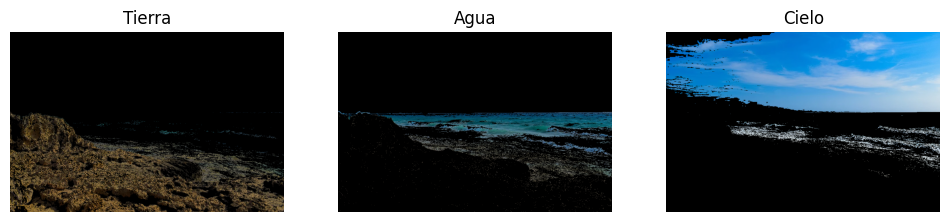

In [122]:
# Cargo la imagen en color, la paso a RGB y la grafico
img = cv.imread('segmentacion.png')
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

# Creamos un grafico de histogramas con los tres canales de color
plt.figure()
plt.xlim([0, 256])
plt.title("Histograma de color")
plt.xlabel("Valor de pixel")
plt.ylabel("Frecuencia")

colors = ("red", "green", "blue")

for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        imgRGB[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)
plt.show()

#Segmentar la imagen en tres regiones (tiera, agua y cielo)
#Tierra
#Tomamos una muestra
muestra_tierra = imgRGB[450:550, 150:250, :]
plt.imshow(muestra_tierra)
plt.show()
#Calculamos un modelo estadístico sencillo para caracterizar el color
color_mean_tierra, color_std_tierra = cv.meanStdDev(muestra_tierra)
#Segmentamos la imagen con la mascara para obtener la region deseada
n_sigma = 1.25
mask_tierra = cv.inRange(imgRGB, color_mean_tierra-color_std_tierra * n_sigma,  color_mean_tierra+color_std_tierra * n_sigma)
img_segmentada_tierra = cv.bitwise_and(imgRGB, imgRGB, mask=mask_tierra)

#Agua
#Tomamos una muestra
muestra_agua = imgRGB[290:370, 650:800, :]
plt.imshow(muestra_agua)
plt.show()
#Calculamos un modelo estadístico sencillo para caracterizar el color
color_mean_agua, color_std_agua = cv.meanStdDev(muestra_agua)
#Segmentamos la imagen con la mascara para obtener la region deseada
n_sigma = 1.25
mask_agua= cv.inRange(imgRGB, color_mean_agua-color_std_agua * n_sigma,  color_mean_agua+color_std_agua * n_sigma)
img_segmentada_agua = cv.bitwise_and(imgRGB, imgRGB, mask=mask_agua)

#Cielo
#Tomamos una muestra
muestra_cielo = imgRGB[0:150, 550:700, :]
plt.imshow(muestra_cielo)
plt.show()
#Calculamos un modelo estadístico sencillo para caracterizar el color
color_mean_cielo, color_std_cielo = cv.meanStdDev(muestra_cielo)
#Segmentamos la imagen con la mascara para obtener la region deseada
n_sigma = 5
mask_cielo = cv.inRange(imgRGB, color_mean_cielo-color_std_cielo * n_sigma,  color_mean_cielo+color_std_cielo * n_sigma)
img_segmentada_cielo = cv.bitwise_and(imgRGB, imgRGB, mask=mask_cielo)

# Visualizar las imágenes segmentadas obtenidas a partir de las mascaras
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_segmentada_tierra)
plt.title('Tierra')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_segmentada_agua)
plt.title('Agua')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_segmentada_cielo)
plt.title('Cielo')
plt.axis('off')

plt.show()